## DIGIT RECOGNIZING - MNIST DATAASET (No pytorch/tf, just NUMPY)


In [27]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd


THE MNIST DATASET WAS DOWNLOADED FROM KAGGLE 

In [26]:
data = pd.read_csv('train.csv') #MNIST DATASET from kaggle
data.head(n=10)



,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
data.shape #we have 42000 images and 785 columns

(42000, 785)

In [32]:
data = np.array(data)
#np.random.shuffle(data) #shuffling the data
m, n = data.shape
m,n

(42000, 785)

In [33]:
x = data[:, 1:].T/255.0  # extracting the pixel value 
y = data[:, 0]   # extracting the labels in the first column
print(x.shape)
print(y.shape)

(784, 42000)
(42000,)


## DIGIT RECOGNIZING - MNIST DATAASET (No pytorch/tf, just NUMPY)


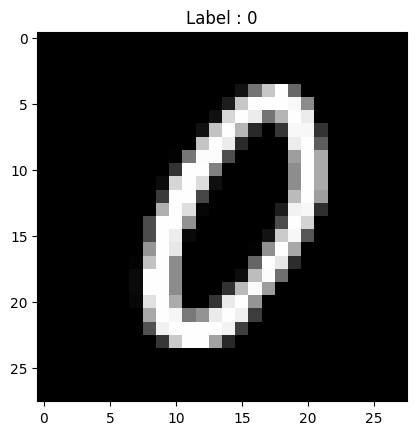

In [34]:
def image(a):
    a = np.random.randint(0, m)
    plt.imshow(x[:, a].reshape(28, 28), cmap='gray')
    plt.title("Label : {}".format(y[a]))
    plt.show()
#random image along with its label
img = image(0)


In [35]:
#one hot encoding
def one_hot(y):
    one_hot_y = np.zeros((10, y.size))
    for i in range(y.size):
        one_hot_y[y[i], i] = 1
    return one_hot_y
one_hot_y = one_hot(y)
one_hot_y.shape

(10, 42000)

In [112]:
#def parameters() :

class Parameters:
    def __init__(self):
        self.W1 = np.random.randn(10, 784)# -0.5 #0.01  # adding bias to the weights
        self.W2 = np.random.randn(10,10) #- 0.5#0.01
        self.b1 = np.zeros((10,m)) #- 0.5
        self.b2 = np.zeros((10, m)) #- 0.5  
        self.alpha  = 0.1    # learning rate
params = Parameters()
W1 = params.W1
W2 = params.W2
b1 = params.b1
b2 = params.b2
alpha = params.alpha
        

print(W1.shape, W2.shape, b1.shape, b2.shape)
x.shape, one_hot_y.shape

W1

(10, 784) (10, 10) (10, 42000) (10, 42000)


array([[-0.82525545, -0.93441485,  0.27613191, ...,  0.90571718,
         0.33664058,  1.03657847],
       [-2.01464642, -0.69609084, -2.02409352, ..., -0.29229256,
         0.57113327, -0.25876952],
       [ 0.36438384, -0.48948263,  0.63012493, ...,  0.3882825 ,
         0.07068455, -0.41737059],
       ...,
       [-0.51497356, -0.97653846,  1.39038689, ...,  0.76486674,
        -0.25638177,  0.50127926],
       [ 0.7810919 , -0.71714019, -0.58291604, ...,  1.03999355,
        -0.465283  ,  0.46669163],
       [ 1.15172787,  1.62656044,  1.42969437, ...,  0.63374729,
         0.8368232 ,  0.31066173]])

In [113]:
#ACTIVATION FUNCTIONS 
 
def RELU(L):
    return np.maximum(0, L)#+ 1e-8  #rectified linear unit

#def softmax(x):
    #x= x -np.max(x)
     # Debugging: Check if softmax output is a valid probability distribution
   # print("Softmax output:\n", softmax_output)
   # print("Sum of probabilities:", np.sum(softmax_output))  # Should be close to 1
    
    #return np.exp(x) / np.sum(np.exp(x), axis=0 , keepdims=True) #softmax function

 

In [114]:
def softmax(x):
    x = x - np.max(x)  # Numerical stability
    softmax_output = np.exp(x) / np.sum(np.exp(x), axis=0, keepdims=True)
    
    # Debugging: Check if softmax output is a valid probability distribution
   # print("Softmax output:\n", softmax_output)
   # print("Sum of probabilities:", np.sum(softmax_output))  # Should be close to 1
    
    return softmax_output
#softmax(np.array([1,2,3,4,5]))


In [115]:
def for_pass(W1, W2, b1, b2, x):
    L1 = np.dot(W1, x) + b1 #first layer
    A1 = RELU(L1) #activation function
    L2 = np.dot(W2, A1) + b2 #second layer
    A2 = softmax(L2) #activation function
    return L1, A1, L2, A2



L1, A1, L2, A2 = for_pass(W1, W2, b1, b2, x)


In [116]:
def der_Relu(x):
    x[x<=0] = 0
    x[x>0] /= 1
    return x

In [117]:
def back_pass(L2, A2, one_hot_y, W2, A1, x, L1):
     #error in the second layer
    dL2 = A2 - one_hot_y  # error in the second layer
    dW2 = np.dot(dL2, A1.T)/m #gradient of the weights in the second layer
    db2 = np.sum(dL2, axis=1, keepdims=True)/m #gradient of the bias in the second layer
    dL1 = np.dot(W2.T, dL2) * der_Relu(L1) #error in the first layer
    dW1 = np.dot(dL1, x.T)/m #gradient of the weights in the first layer
    db1 = np.sum(dL1, axis=1, keepdims=True)/m #gradient of the bias in the first layer
    return dL2, dW2, db2, dL1, dW1, db1
  

In [118]:
def weight_update(W1, W2, b1, b2, dW1, dW2, db1, db2, alpha) :
    #alpha = 0.01
    W1 = W1 - alpha*dW1    #aplha is the learning rate
    W2 = W2 - alpha*dW2
    b1 = b1 - alpha*db1
    b2 = b2 - alpha*db2
    return W1, W2, b1, b2

In [119]:
def get_predictions(A2) :
    return np.argmax(A2, 0) #returns the index of the maximum value in the array

In [120]:
def get_accuracy(predictions, y):
    return (np.sum(predictions == y) / y.size ) * 100 # returns the accuracy of the model


In [121]:
def compute_loss(A2, one_hot_y):
    m = one_hot_y.shape[1]  # Number of examples
    # Cross-entropy loss
    loss = -np.sum(one_hot_y * np.log(A2 + 1e-8)) / m  # Adding epsilon to avoid log(0)
    return loss

In [122]:
def gradient_descent(x, one_hot_y, alpha, iterations):
    #W1, W2, b1, b2 = parameters()
    W1 = params.W1
    W2 = params.W2
    b1 = params.b1
    b2 = params.b2
    for i in range(iterations):
        #forward pass
        L1, A1, L2, A2 = for_pass(W1, W2, b1, b2, x)
        
       
        #backward pass 
        dL2, dW2, db2, dL1, dW1, db1 = back_pass(L2, A2, one_hot_y, W2, A1, x, L1)
        #weight update
        W1, W2, b1, b2 = weight_update(W1, W2, b1, b2, dW1, dW2, db1, db2, alpha)
        # calculating accuracy
        predictions = get_predictions(A2)
        accuracy = get_accuracy(predictions, y)
        loss = compute_loss(A2, one_hot_y)
        if i % 100 == 0:
           print(f"accuracy is {accuracy}")
           print(f"loss is {loss}")
    print(f"Final accuracy is {accuracy}")
    return W1, W2, b1, b2, A2
            
W1, W2, b1, b2, A2 = gradient_descent(x, one_hot_y, 0.2, 2000)
L1, A1, L2, A2 = for_pass(W1, W2, b1, b2, x)
predictions = get_predictions(A2)
accuracy = get_accuracy(predictions, y)
#print(f"Final accuracy is {accuracy}")


 

accuracy is 17.05952380952381
loss is 13.27642643676766
accuracy is 20.257142857142856
loss is 2.1281794409557757
accuracy is 25.10952380952381
loss is 2.00230900436946
accuracy is 29.13809523809524
loss is 1.8985354969474564
accuracy is 31.05952380952381
loss is 1.8358730046875718
accuracy is 32.63095238095238
loss is 1.7906023434234597
accuracy is 36.7952380952381
loss is 1.7082816834164125
accuracy is 41.319047619047616
loss is 1.565325422927654
accuracy is 42.43571428571429
loss is 1.5120716437614496
accuracy is 43.471428571428575
loss is 1.473662549464279
accuracy is 44.23809523809524
loss is 1.4435782987636443
accuracy is 44.892857142857146
loss is 1.4177804159001393
accuracy is 45.44761904761905
loss is 1.3954322931550411
accuracy is 46.00476190476191
loss is 1.3765715961142215
accuracy is 46.53333333333333
loss is 1.3601810517327915
accuracy is 46.983333333333334
loss is 1.3463020416878861
accuracy is 47.304761904761904
loss is 1.3351207924405426
accuracy is 47.57857142857143
l

accuracy is 17.05952380952381
loss is 13.27642643676766
accuracy is 25.10952380952381
loss is 2.00230900436946
accuracy is 31.05952380952381
loss is 1.8358730046875718
accuracy is 36.7952380952381
loss is 1.7082816834164125
accuracy is 42.43571428571429
loss is 1.5120716437614496
accuracy is 44.23809523809524
loss is 1.4435782987636443
accuracy is 45.44761904761905
loss is 1.3954322931550411
accuracy is 46.53333333333333
loss is 1.3601810517327915
accuracy is 47.304761904761904
loss is 1.3351207924405426
accuracy is 47.85476190476191
loss is 1.3167696487340201
accuracy is 48.33571428571429
loss is 1.3008942099405922
accuracy is 48.70238095238095
loss is 1.288016736853984
accuracy is 49.02142857142857
loss is 1.2778281826180327
accuracy is 49.28571428571429
loss is 1.2699275583581895
accuracy is 49.423809523809524
loss is 1.2637179209712324
accuracy is 49.54047619047619
loss is 1.258365076970093
accuracy is 49.65
loss is 1.253572104727942
accuracy is 49.7
loss is 1.2492501022024067
accu

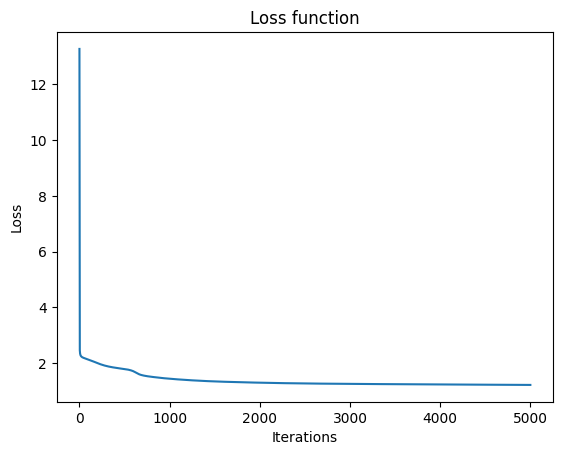

In [126]:
def gradient_descent(x, one_hot_y, alpha, iterations):
    #W1, W2, b1, b2 = parameters()
    W1 = params.W1
    W2 = params.W2
    b1 = params.b1
    b2 = params.b2
    losses = []  # Initialize an empty list to store loss values
    for i in range(iterations):
        #forward pass
        L1, A1, L2, A2 = for_pass(W1, W2, b1, b2, x)
        
        #backward pass 
        dL2, dW2, db2, dL1, dW1, db1 = back_pass(L2, A2, one_hot_y, W2, A1, x, L1)
        #weight update
        W1, W2, b1, b2 = weight_update(W1, W2, b1, b2, dW1, dW2, db1, db2, alpha)
        # calculating accuracy
        predictions = get_predictions(A2)
        accuracy = get_accuracy(predictions, y)
        loss = compute_loss(A2, one_hot_y)
        losses.append(loss)  # Store the loss value
        if i % 200 == 0:
           print(f"accuracy is {accuracy}")
           print(f"loss is {loss}")
    print(f"Final accuracy is {accuracy}")
    return W1, W2, b1, b2, A2, losses
            
W1, W2, b1, b2, A2, losses = gradient_descent(x, one_hot_y, 0.2, 5000)
L1, A1, L2, A2 = for_pass(W1, W2, b1, b2, x)
predictions = get_predictions(A2)
accuracy = get_accuracy(predictions, y)
#print(f"Final accuracy is {accuracy}")

plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss function')
plt.show()

 

accuracy is 17.05952380952381
loss is 13.27642643676766
accuracy is 19.36904761904762
loss is 2.15835088760557
accuracy is 25.626190476190473
loss is 2.0198306665671635
accuracy is 35.56190476190476
loss is 1.7632664508655065
accuracy is 38.83095238095238
loss is 1.6452516909841448
accuracy is 40.31428571428572
loss is 1.5849706470563354
accuracy is 41.385714285714286
loss is 1.5425015507261723
accuracy is 42.33571428571429
loss is 1.5069426176324292
accuracy is 43.13809523809524
loss is 1.4752409000128448
accuracy is 44.24285714285715
loss is 1.4425837541132625
accuracy is 45.095238095238095
loss is 1.4148400479753758
accuracy is 45.83095238095238
loss is 1.3915313928038853
accuracy is 46.40238095238095
loss is 1.3723986873001868
accuracy is 46.87380952380952
loss is 1.3566090495860907
accuracy is 47.273809523809526
loss is 1.3427495898951134
accuracy is 47.60714285714286
loss is 1.3311154133162126
accuracy is 47.86666666666667
loss is 1.3215105587743408
accuracy is 48.18333333333334


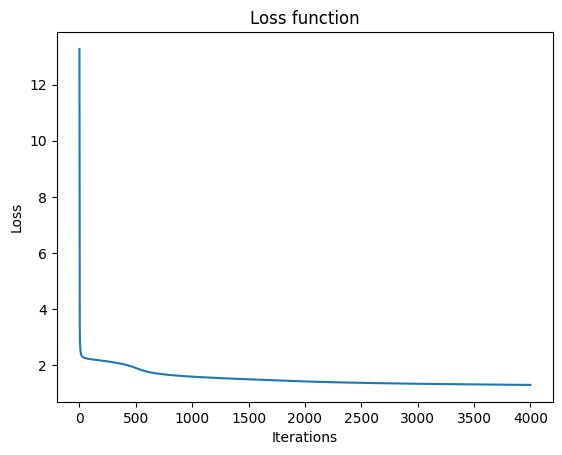

In [129]:
W1, W2, b1, b2, A2, losses = gradient_descent(x, one_hot_y, 0.1, 4000)
L1, A1, L2, A2 = for_pass(W1, W2, b1, b2, x)
predictions = get_predictions(A2)
accuracy = get_accuracy(predictions, y)
#print(f"Final accuracy is {accuracy}")

plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss function')
plt.show()

 

